## <center> Análise da base de Alimentos Regularizados e Situação do Registro </center>

#### <center> 📈 Análise de Dados 📉

#### Importações

In [48]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

#### Consumindo a base vinda de um arquivo pickle

In [49]:
base = pickle.load(open('base_consumo', 'rb'))

display(base)

,Country,PopulationGroup,ConsumptionCategory,ConsumptionSpecificity,GramsPerDays,Days,GramsOneDay,AggregatedCategory
0,Austria,Adults,Alcoholic beverages,Alcoholic beverages,2123,7,303.3,Alcoholic beverages
1,Austria,Adults,Alcoholic beverages,Beer and beer-like beverage,2123,7,303.3,Alcoholic beverages
2,Austria,Adults,Alcoholic beverages,Beer and beer-like beverage,2123,7,303.3,Alcoholic beverages
3,Austria,Adults,Alcoholic beverages,Beer and beer-like beverage,2123,7,303.3,Alcoholic beverages
4,Austria,Adults,Alcoholic beverages,Beer and beer-like beverage,2123,7,303.3,Alcoholic beverages
...,...,...,...,...,...,...,...,...
307079,United Kingdom,Toddlers,Water and water-based beverages,Water based beverages,5217,6,869.5,Water and water-based beverages
307080,United Kingdom,Toddlers,Water and water-based beverages,Water based beverages,5217,6,869.5,Water and water-based beverages
307081,United Kingdom,Toddlers,Water and water-based beverages,Water based beverages,5217,6,869.5,Water and water-based beverages
307082,United Kingdom,Toddlers,Water and water-based beverages,Water based beverages,5217,6,869.5,Water and water-based beverages


#### Separando atributos e respostas

In [50]:
df_resposta = base['PopulationGroup']
df_atributos = base.drop(columns='PopulationGroup')

#### Transformando dados

In [51]:
label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(df_resposta)

preprocessador = ColumnTransformer(transformers=[('categoricas', OrdinalEncoder(), make_column_selector(dtype_include=['object','bool']))],
                                    remainder='passthrough',
                                    verbose_feature_names_out=False)

x_enconded = preprocessador.fit_transform(df_atributos)

classifier = GaussianNB()

#### <center> Naive Bayes

#### Com Cross Val e OverSample

Melhor valor de k: 10
Cross-Validation Scores: [0.31795245 0.27487105 0.30690952 0.31977411 0.33376667 0.32156336
 0.31198803 0.31321815 0.31408482 0.31307836]
Mean Accuracy: 0.3127206523344059
Confusion Matrix:
[[ 1446  4765 13858  5250 11050 14447 11224   799 16648]
 [ 1424 32138  3049 14203  1124 17147  4396   231  5775]
 [ 1197   557 16691  4340 17335  5972  4737    22 28636]
 [  110 14975 15928  7792 20237  3142    21    41 17241]
 [    0     0  1313     0 78174     0     0     0     0]
 [  845  3112 13910  4125  5636 26906  9839   768 14346]
 [  162     1     0  1137     0  7177 26912   119 43979]
 [   64  6607 10643  4120 23899  5673  5731     9 22741]
 [   34     0  6040     0 35347  1544  2873     2 33647]]


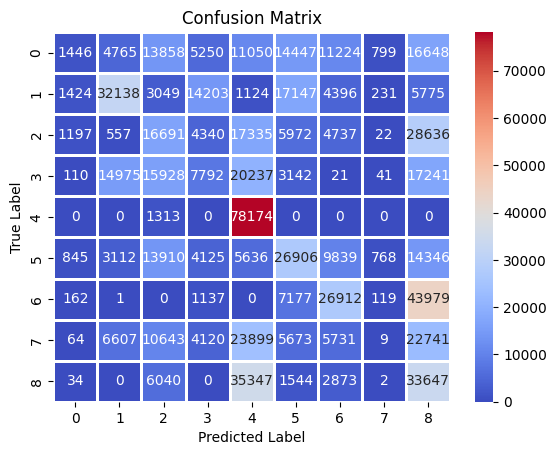

In [55]:
# Aplicar SMOTE
smote = SMOTE()
x_transformed, y_transformed = smote.fit_resample(x_enconded, y_encoded)

k_values = []
accuracies = []
maior_acuracia = -1
cv_final = 0
contador = 0

# Loop para encontrar o melhor valor de separação
for i in range(10):
    k = 2 + contador
    cv_scores = cross_val_score(classifier, x_transformed, y_transformed, cv=k, scoring='accuracy')
    media = cv_scores.mean()

    k_values.append(k)
    accuracies.append(media)

    if media > maior_acuracia:
        maior_acuracia = media
        cv_final = k

    contador = contador + 1

print(f"Melhor valor de k: {cv_final}")

# Ajustar valor de cv para algo razoável, como 5 ou 10
cv_scores = cross_val_score(classifier, x_transformed, y_transformed, cv=cv_final, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Usar y_transformed para a matriz de confusão
conf_matrix = confusion_matrix(y_transformed, cross_val_predict(classifier, x_transformed, y_transformed, cv=cv_final))
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Com Cross Val e UnderSample

49
Cross-Validation Scores: [0.24543796 0.51459854 0.69434307 0.60173358 0.81113139 0.80976277
 0.60173358 0.41605839 0.68841241 0.44160584 0.61085766 0.80748175
 0.74224453 0.61313869 0.73677007 0.79607664 0.58531022 0.56021898
 0.63822993 0.72399635 0.80702555 0.8024635  0.56478102 0.73129562
 0.49680657 0.7084854  0.3754562  0.69890511 0.69936131 0.75319343
 0.8129562  0.80793796 0.37408759 0.72354015 0.46304745 0.6455292
 0.81523723 0.30520073 0.55383212 0.69571168 0.62756732 0.80830671
 0.80191693 0.65769055 0.40529439 0.69876769 0.43998174 0.6052031
 0.80876312]
Mean Accuracy: 0.6393364878924881
Confusion Matrix:
[[    0  1160   543     9   453   125   473     3   723]
 [   45 56698  2782  1251  1004  7373  4410    88  5836]
 [    0   505   594     4   718   116   224     2  1326]
 [    0  1115   618     2   629    56     4     2  1063]
 [    0     0    68     0  3421     0     0     0     0]
 [    2  1128   573    16   205   444   422     2   697]
 [    0   333     0    12     0

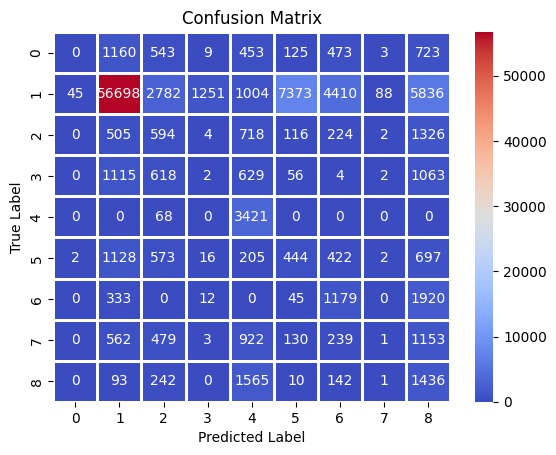

In [56]:
rus = RandomUnderSampler(random_state=42, sampling_strategy='not majority')

# Realiza o undersampling
X_resampled, y_resampled = rus.fit_resample(x_enconded, y_encoded)

k_values = []
accuracies = []
maior_acuracia = -1
cv_final = 0

# Loop para encontrar o melhor valor de separações
for contador in range(50):
    k = 2 + contador
    cv_scores = cross_val_score(classifier, X_resampled, y_resampled, cv=k, scoring='accuracy')
    media = cv_scores.mean()

    k_values.append(k)
    accuracies.append(media)

    if media > maior_acuracia:
        maior_acuracia = media
        cv_final = k
print(cv_final)

cv_scores = cross_val_score(classifier, X_resampled, y_resampled, cv=cv_final, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_resampled, cross_val_predict(classifier, X_resampled, y_resampled, cv=5))
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


#### Sem CrossVal com UnderSample

C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       882
           1       0.93      0.79      0.85     19903
           2       0.09      0.16      0.12       846
           3       0.00      0.00      0.00       840
           4       0.39      0.98      0.55       906
           5       0.12      0.12      0.12       861
           6       0.16      0.33      0.21       858
           7       0.00      0.00      0.00       858
           8       0.10      0.41      0.17       896

    accuracy                           0.65     26850
   macro avg       0.20      0.31      0.23     26850
weighted avg       0.72      0.65      0.67     26850

Confusion Matrix:
[[    0   304   142     0   109    25   112     1   189]
 [    0 15716   669     0   252   685  1101     3  1477]
 [    0   118   136     0   183    22    51     0   336]
 [    0   257   149     0   158     5     0     0   271]
 [    0     0    21     0   885     0     0     0

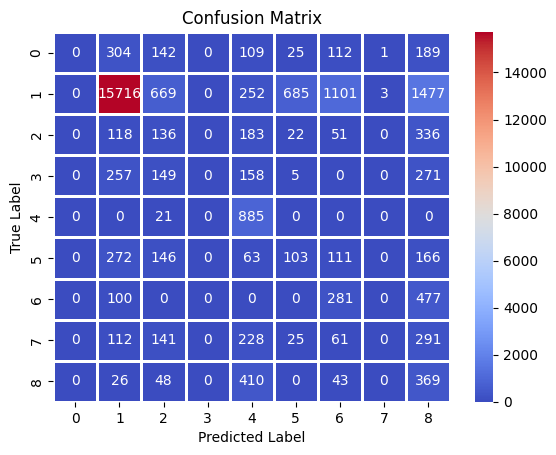

In [57]:
rus = RandomUnderSampler(random_state=42, sampling_strategy = 'not majority')

X_resampled, y_X_resampled = rus.fit_resample(x_enconded, y_encoded)

x_treino, x_teste, y_treino, y_teste = train_test_split(X_resampled, y_X_resampled, test_size=0.25, random_state=0)

treinando = classifier.fit(x_treino, y_treino)

previsao = classifier.predict(x_teste)

report = classification_report(y_teste, previsao)
print(report)

conf_matrix = confusion_matrix(y_teste, previsao)
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Sem CrossVal com OverSample

              precision    recall  f1-score   support

           0       0.22      0.01      0.02     19857
           1       0.52      0.42      0.46     19915
           2       0.21      0.22      0.21     20068
           3       0.20      0.10      0.13     19970
           4       0.41      0.98      0.57     20034
           5       0.34      0.37      0.35     19706
           6       0.41      0.34      0.37     19768
           7       0.00      0.00      0.00     19915
           8       0.18      0.42      0.25     19613

    accuracy                           0.32    178846
   macro avg       0.28      0.32      0.26    178846
weighted avg       0.28      0.32      0.26    178846

Confusion Matrix:
[[ 2043  4557 14049  5663 10936 13456 11304  1091 16388]
 [ 1724 30924  2974 15629  1069 16020  4688   629  5830]
 [ 1263   603 16721  4224 17402  5620  4825    21 28808]
 [  111 15107 15550  7712 20822  3391    71   179 16544]
 [    0     0  1251     0 78236     0     0     0

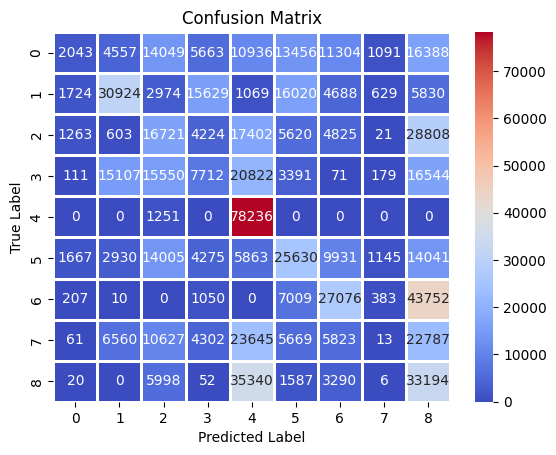

In [58]:
smote = SMOTE()

x_transformed, y_transformed = smote.fit_resample(x_enconded, y_encoded)

x_treino, x_teste, y_treino, y_teste = train_test_split(x_transformed, y_transformed, test_size=0.25, random_state=0)

treinando = classifier.fit(x_treino, y_treino)

previsao = classifier.predict(x_teste)

report = classification_report(y_teste, previsao)
print(report)

conf_matrix = confusion_matrix(y_transformed, cross_val_predict(classifier, x_transformed, y_transformed, cv=5))
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### PCA com atributos para Naive Bayes

In [59]:
pca = PCA(n_components=5)
pca.fit(x_enconded)

PCA(n_components=5)

In [60]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[9.91618993e-01 8.29959987e-03 7.27732541e-05 4.01339582e-06
 3.92400387e-06]
[1925989.22769286  176201.66711803   16499.36890346    3874.69419898
    3831.29990555]


#### Treinando modelo com as alterações do PCA e UnderSample

C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       882
           1       0.91      0.86      0.88     19903
           2       0.07      0.08      0.07       846
           3       0.00      0.00      0.00       840
           4       0.35      0.85      0.49       906
           5       0.00      0.00      0.00       861
           6       0.12      0.23      0.16       858
           7       0.00      0.00      0.00       858
           8       0.16      0.58      0.25       896

    accuracy                           0.69     26850
   macro avg       0.18      0.29      0.21     26850
weighted avg       0.70      0.69      0.69     26850

Confusion Matrix:
[[    0   342    97     0    94     0   133     0   216]
 [    0 17019   350     0   561     0  1078     0   895]
 [    0   153    65     0   154     0    67     0   407]
 [    0   275    88     0   136     0    16     0   325]
 [    0    17     0     0   766     0     0     0

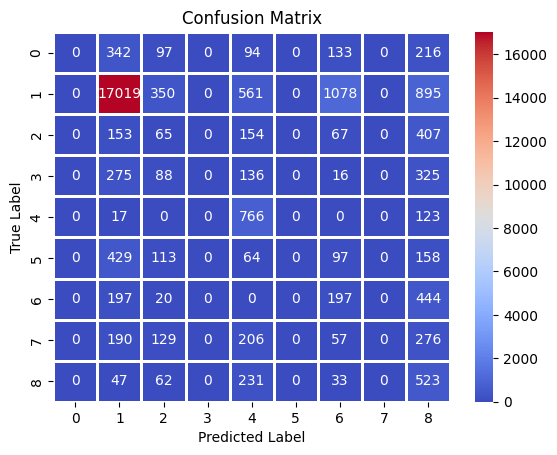

In [61]:
reduced_x = pca.transform(x_enconded)

rus = RandomUnderSampler(random_state=0, sampling_strategy = 'not majority')

x_resampled, y_resampled = rus.fit_resample(reduced_x, y_encoded)

x_treino, x_teste, y_treino, y_teste = train_test_split(x_resampled, y_resampled, test_size=0.25, random_state=0)

treinando = classifier.fit(x_treino, y_treino)

previsao = classifier.predict(x_teste)

report = classification_report(y_teste, previsao)
print(report)

conf_matrix = confusion_matrix(y_teste, previsao)
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Treinando modelo com as alterações do PCA, UnderSample e CrossVal

10
Cross-Validation Scores: [0.71666667 0.67914339 0.73547486 0.68854749 0.69143389 0.6698324
 0.71582868 0.60800745 0.76303538 0.6303194 ]
Mean Accuracy: 0.6898289601433574
Confusion Matrix:
[[    0  1440   358     0   394     6   459     0   832]
 [    0 68083  1306     0  2164    34  4258     0  3642]
 [    0   662   283     0   570     2   267     0  1705]
 [    0  1257   383     0   502     0    65     0  1282]
 [    0    67     0     0  3016     0     0     0   406]
 [    0  1751   428     0   245    18   390     0   657]
 [    0   890    72     0     0     3   653     0  1871]
 [    0   880   432     0   895     3   231     0  1048]
 [    0   170   212     0   969     0   118     0  2020]]


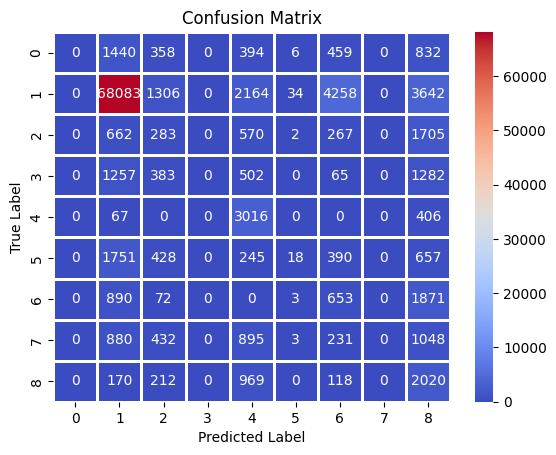

In [62]:
reduced_x = pca.transform(x_enconded)

rus = RandomUnderSampler(random_state=0, sampling_strategy = 'not majority')

x_resampled, y_resampled = rus.fit_resample(reduced_x, y_encoded)

sep_values = []
accuracies = []
maior_acuracia = -1
cv_final = 0

# Loop para encontrar o melhor valor de separação
for contador in range(50):
    k = 2 + contador
    cv_scores = cross_val_score(classifier, x_resampled, y_resampled, cv=k, scoring='accuracy')
    media = cv_scores.mean()

    sep_values.append(k)
    accuracies.append(media)

    if media > maior_acuracia:
        maior_acuracia = media
        cv_final = k

print(cv_final)

# Executa a validação cruzada com a melhor separação
cv_scores = cross_val_score(classifier, x_resampled, y_resampled, cv=cv_final, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_resampled, cross_val_predict(classifier, x_resampled, y_resampled, cv=5))
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Acabei não colocando o Grid, pois descobri os melhores valores manualmente

#### <center> KNN

#### KNN com menor K

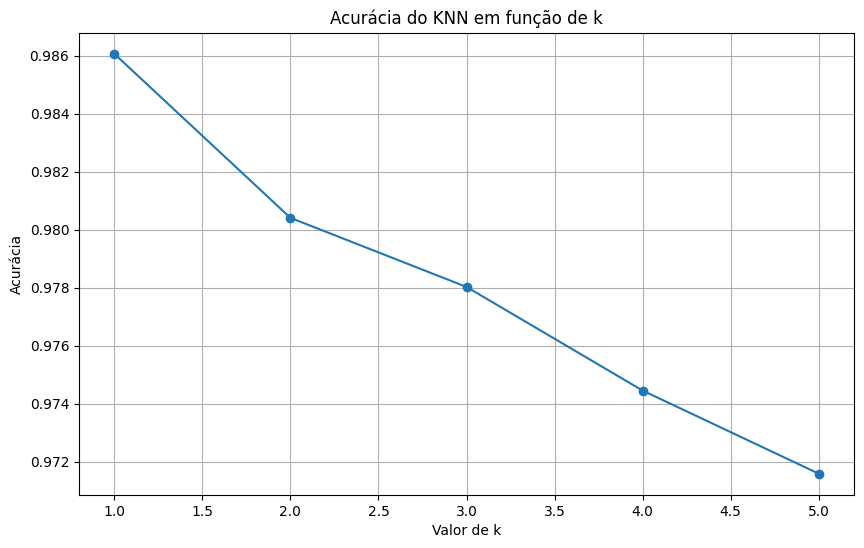

O melhor valor de k é: 5, com uma acurácia de: 0.9715828677839851


In [63]:
k_values = []
accuracies = []
maior_acuracia = 1
k_final = 0

for contador in range(5):
    k = 1 + contador
    classificador_knn = KNeighborsClassifier(n_neighbors=k)
    classificador_knn.fit(x_treino, y_treino)

    previsao_knn = classificador_knn.predict(x_teste)
    acuracia = accuracy_score(y_teste, previsao_knn)

    k_values.append(k)
    accuracies.append(acuracia)

    if acuracia < maior_acuracia:
        maior_acuracia = acuracia
        k_final = k

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('Acurácia do KNN em função de k')
plt.xlabel('Valor de k')
plt.ylabel('Acurácia')
plt.grid(True)
plt.show()

print(f"O melhor valor de k é: {k_final}, com uma acurácia de: {maior_acuracia}")


#### Criando um classificador com o K de valor mais baixo

In [64]:
classificador_knn = KNeighborsClassifier(n_neighbors=k_final)

#### Treinando com CrossVal

4
Cross-Validation Scores: [0.89495997 0.45087687 0.76249473 0.91427481]
Mean Accuracy: 0.7556515957446809
Confusion Matrix:
[[    0  1160   543     9   453   125   473     3   723]
 [   45 56698  2782  1251  1004  7373  4410    88  5836]
 [    0   505   594     4   718   116   224     2  1326]
 [    0  1115   618     2   629    56     4     2  1063]
 [    0     0    68     0  3421     0     0     0     0]
 [    2  1128   573    16   205   444   422     2   697]
 [    0   333     0    12     0    45  1179     0  1920]
 [    0   562   479     3   922   130   239     1  1153]
 [    0    93   242     0  1565    10   142     1  1436]]


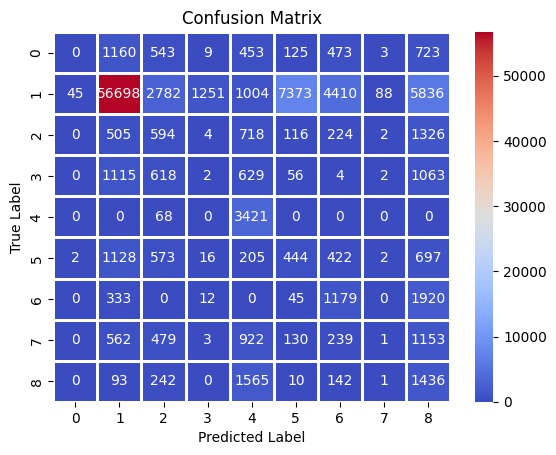

In [65]:

sep_values = []
accuracies = []
maior_acuracia = -1
cv_final = 0
    
# Loop para encontrar o melhor quantia de separações para o CrossVal
for contador in range(10):
    k = 2 + contador
    cv_scores = cross_val_score(classificador_knn, x_enconded, y_encoded, cv=k, scoring='accuracy')
    media = cv_scores.mean()

    sep_values.append(k)
    accuracies.append(media)

    if media > maior_acuracia:
        maior_acuracia = media
        cv_final = k

print(cv_final)

cv_scores = cross_val_score(classificador_knn, x_enconded, y_encoded, cv=cv_final, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_resampled, cross_val_predict(classifier, X_resampled, y_resampled, cv=5))
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


#### Testando sem CrossVal

In [66]:
acuracia = accuracy_score( y_teste, previsao_knn)

print(acuracia)

matriz = confusion_matrix(y_teste, previsao_knn)
print(matriz)

0.9715828677839851
[[  702    65    32    15     0     7     7    22    32]
 [    0 19903     0     0     0     0     0     0     0]
 [   26    13   714    44    19    14     0    13     3]
 [    0    15    23   771     0     1     0    27     3]
 [    0     0     0     0   906     0     0     0     0]
 [   10   102    39    14     3   645     8    23    17]
 [    0     0     0     0     0     0   858     0     0]
 [    4    21     7    30     0    10     0   784     2]
 [   18     8     3     8    13     8    29     5   804]]


Sem nenhuma outra alteração, o modelo se adequava muito ao treino :/

#### Tentando abaixar a acurácia com UnderSample

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       537
           1       0.94      0.86      0.90       519
           2       0.82      0.83      0.83       483
           3       0.86      0.94      0.90       504
           4       0.93      1.00      0.96       518
           5       0.90      0.82      0.86       539
           6       0.98      1.00      0.99       532
           7       0.91      0.93      0.92       554
           8       0.91      0.89      0.90       525

    accuracy                           0.90      4711
   macro avg       0.90      0.90      0.90      4711
weighted avg       0.90      0.90      0.90      4711

Confusion Matrix:
[[456  10  25  14   1   3   2  14  12]
 [ 29 446  11   5   0  22   0   5   1]
 [ 18   0 403  25  16  12   0   5   4]
 [  0   2  12 474   0   1   0  13   2]
 [  0   0   0   0 518   0   0   0   0]
 [ 13  13  19  11   3 443   2  12  23]
 [  0   0   0   0   0   0 532   0   0]
 [  

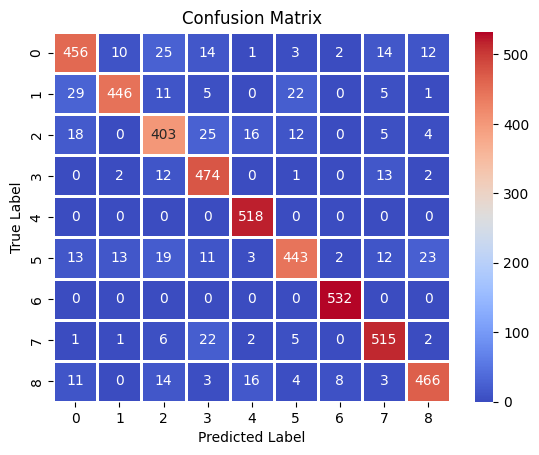

In [67]:
rus = RandomUnderSampler(random_state=0, sampling_strategy = 'auto')

X_resampled, y_resampled = rus.fit_resample(x_enconded, y_encoded)

x_treino, x_teste, y_treino, y_teste = train_test_split(X_resampled, y_resampled, test_size=0.15, random_state=0)

treinandoKNN = classificador_knn.fit(x_treino, y_treino)

previsao = classificador_knn.predict(x_teste)

report = classification_report(y_teste, previsao)
print(report)

conf_matrix = confusion_matrix(y_teste, previsao)
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Tentando abaixar com OverSample e CrossVal

10
Cross-Validation Scores: [0.93483275 0.90475125 0.9278156  0.91373815 0.909922   0.94402975
 0.91650591 0.94351254 0.94660181 0.92166401]
Mean Accuracy: 0.9263373767793338
Confusion Matrix:
[[78863    21   164    42     0     3     2    28   364]
 [17375 29781  5433  7890     0 12334     0  6596    78]
 [  114     0 78524   619    79   119     0    13    19]
 [    0     1    32 78408     0     0     0  1046     0]
 [    0     0     0     0 79487     0     0     0     0]
 [   76   311   584    44     0 77826     0   116   530]
 [    0     0     0     0     0     0 79487     0     0]
 [    8    14     0  2732     0     0     0 76733     0]
 [   82     0     0     6    19    21     2     0 79357]]


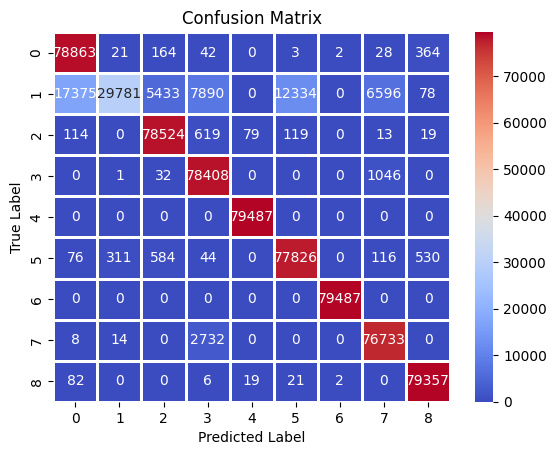

In [68]:
smote = SMOTE()

x_transformed, y_transformed = smote.fit_resample(x_enconded, y_encoded)

sep_values = []
accuracies = []
maior_acuracia = -1
cv_final = 0

# Loop para encontrar o melhor separação de CrossVal
for contador in range(10):
    k = 2 + contador
    cv_scores = cross_val_score(classificador_knn, x_transformed, y_transformed, cv=k, scoring='accuracy')
    media = cv_scores.mean()

    sep_values.append(k)
    accuracies.append(media)

    if media > maior_acuracia:
        maior_acuracia = media
        cv_final = k

print(cv_final)

cv_scores = cross_val_score(classificador_knn, x_transformed, y_transformed, cv=cv_final, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_transformed, cross_val_predict(classificador_knn, x_transformed, y_transformed, cv=5))
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
